# What is RFM technique ?
___
<i> RFM (Recency, Frequency, Monetary) analysis is a proven marketing model for behavior based customer segmentation. It groups customers based on their transaction history – how recently, how often and how much did they buy.

RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.<i>

<center><img alt="High Value Customer“ ..what is it? | by Ryan Seitz | Medium" class="n3VNCb" src="https://miro.medium.com/max/638/0*JddVeZpHXdElEec_" data-noaft="1" jsname="HiaYvf" jsaction="load:XAeZkd,gvK6lb;" style="width: 800px; height: 400px; margin: 2.73307px 0px;">

# How the K-means algorithm works ?
---
<i> Clustering is the process of dividing the entire data into groups (also known as clusters) based on the patterns in the data.<i>   
    
<i> To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids.</i>
    
<img alt="3d scatter plot for MS Excel" class="n3VNCb" src="https://www.doka.ch/3dscatterplotrotateanim.gif" data-noaft="1" jsname="HiaYvf" jsaction="load:XAeZkd,gvK6lb;" style="width: 378px; height: 378px; margin: 0px;">

---
### Data Set Information : Online Retail Data set
<i> This is a transnational data set which contains all the transactions occurring between 01/12/20210 and 09/12/2011 for a UK-based and registered non-store online retail.  
    Data can be downloaded from kaggle <a href = https://www.kaggle.com/vijayuv/onlineretail> Online Retail Data Set - Kaggle </a>, and also available on <a href = https://archive.ics.uci.edu/ml/datasets/online+retail > UCI Machine Learning Repository.<a/></i>   

### Attribute Information:

* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal, the name of the country where each customer resides


--- 
## To segment the customers will calculate :
* [RFM Scores for each customers](#RFM)<br>
* [Create clusters using K-means](#K_Means)<b>

# Libraries :

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler as ss

In [2]:
# Data reading and printing head of the data 
data = pd.read_excel("/kaggle/input/online-retail-data-set-from-uci-ml-repo/Online Retail.xlsx")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
#Checking the shape of the data set
data.shape

(541909, 8)

In [4]:
#checking the basic information/details of the data
data.info(),data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


(None,
             Quantity      UnitPrice     CustomerID
 count  541909.000000  541909.000000  406829.000000
 mean        9.552250       4.611114   15287.690570
 std       218.081158      96.759853    1713.600303
 min    -80995.000000  -11062.060000   12346.000000
 25%         1.000000       1.250000   13953.000000
 50%         3.000000       2.080000   15152.000000
 75%        10.000000       4.130000   16791.000000
 max     80995.000000   38970.000000   18287.000000)

In [5]:
# Detailing the Country distribution and customerid
country_data = data[['Country','CustomerID']].drop_duplicates()
country_data.groupby(['Country']).agg({'CustomerID' : 'count'}).sort_values('CustomerID',ascending = False).reset_index().rename(columns = {'CustomerID':'CustomerID Count'})

,Country,CustomerID Count
0,United Kingdom,3950
1,Germany,95
2,France,87
3,Spain,31
4,Belgium,25
5,Switzerland,21
6,Portugal,19
7,Italy,15
8,Finland,12
9,Austria,11


<i> So we can see that mostly customers are from the UK. So we will keep the data for the United Kingdom only and will filter out all others country data.

In [6]:
#Creating a duplicate of the data 
data1 = data.copy()

In [7]:
#filtering out the data set for UK only
data = data[data['Country'] == 'United Kingdom'].reset_index(drop = True)
#data = data.query("Country == 'United Kingdom'")
data.shape

(495478, 8)

In [8]:
#checking for null values
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

<i>So we wil filter out the data/rows where the CustomerID is missing because those will not make any sence as the cutomer level attributes.

In [9]:
#Dropping the rows where customerID is missing
data = data[pd.notnull(data['CustomerID'])]

#Checking the description of the data
data.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


<i> From the above summary report we can see that in Quantity columns the minimum value is -80995.000000, which is not be possible as the quantity value can't be negative. And will filter out all the rows where the Quantity values is positive.

In [10]:
#filtering data for positive quantity values
data = data.query("Quantity > 0")
data.shape

(354345, 8)

<i> To evaluate the Monetary values at customer level we wil requires the total amount for each purchses

In [11]:
#Adding new columns as total amount
data['TotalAmount'] = data['UnitPrice']*data['Quantity']

<i> <b>Till Here we have done the data cleaning and preprocessing parts. And data is good to use.

<a id = "RFM"><a/><b>
# RFM Modeling Technique :
---
<i> <b> Here we will calculate the Recency, Frequency and Monetary for the customers and those are defined as ;   
* Recency : How much time has elapsed since a customer's last activity or transaction with the brand?   
* Frequency : How often has a customer transacted or interacted with the brand during a particular period of time?  
* Monetary : How much a customer has spent with the brand during a particular period of time?

In [12]:
# For recency will check what was the last date of transaction
#First will convert the InvoiceDate as date variable
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])
data['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

<i> so the last date was 2011-12-09 for transaction. So will take latest date for benchmark as 2011-12-10, for the calculation of the Recency.

In [13]:
#RFM factors calculation:
Latest_date = dt.datetime(2011,12,10)
RFM_data = data.groupby('CustomerID').agg({'InvoiceDate' : lambda x :(Latest_date - x.max()).days,
                                          'InvoiceNo' : 'count','TotalAmount' : 'sum'}).reset_index()

#converting the names of the columns
RFM_data.rename(columns = {'InvoiceDate' : 'Recency',
                          'InvoiceNo' : "Frequency",
                          'TotalAmount' : "Monetary"},inplace = True)
RFM_data.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [14]:
# RFM_data Description/ Summary
RFM_data.iloc[:,1:4].describe()

,Recency,Frequency,Monetary
count,3921.000000,3921.000000,3921.000000
mean,91.722265,90.371079,1863.910113
std,99.528532,217.796155,7481.922217
min,0.000000,1.000000,0.000000
25%,17.000000,17.000000,300.040000
50%,50.000000,41.000000,651.820000
75%,142.000000,99.000000,1575.890000
max,373.000000,7847.000000,259657.300000


<i> From above result, we can observe that average recency of the customers are 92 days (approx), an average customer are purchasing the product 90 times and spending an average 1863.91 unitprice.

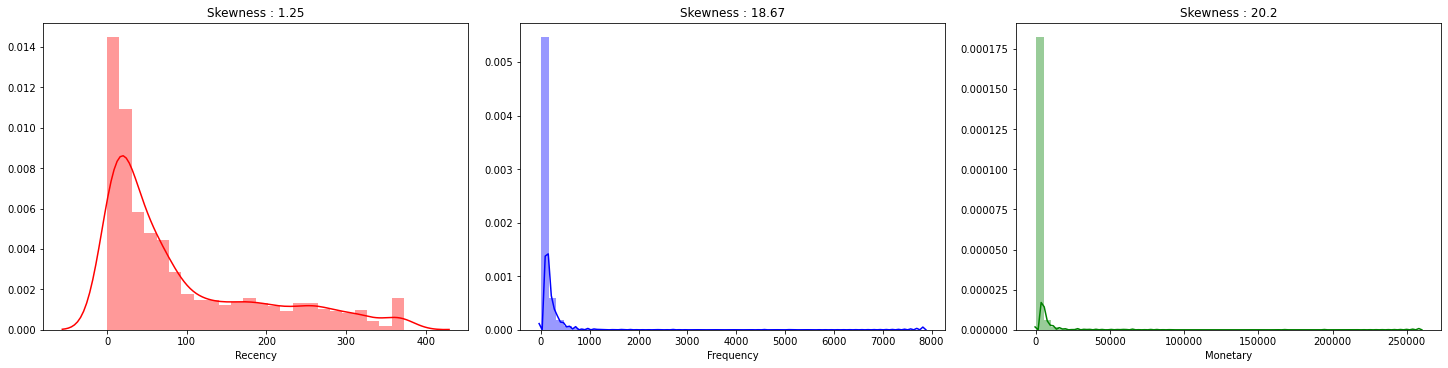

In [15]:
#Visualizing the Recency, Frequency and Monetary distributions.
i = 0
fig = plt.figure(constrained_layout = True,figsize = (20,5))
gs = GridSpec(1, 3, figure=fig)    

col = ['red','blue','green']
for var in list(RFM_data.columns[1:4]):
    plt.subplot(gs[0,i])
    sns.distplot(RFM_data[var],color= col[i])
    plt.title('Skewness ' + ': ' + round(RFM_data[var].skew(),2).astype(str))
    i= i+1

<i> From above distribution plots we can observe that all of these three metrics are positively skewed or right skewed. And also as per skewness coefficient values indicating same.

In [16]:
#Segmentation :
#Here, we will divide the data set into 4 parts based on the quantiles.
quantiles = RFM_data.drop('CustomerID',axis = 1).quantile(q = [0.25,0.5,0.75])
quantiles.to_dict()

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Monetary': {0.25: 300.03999999999996,
  0.5: 651.8200000000002,
  0.75: 1575.8900000000003}}

In [17]:
#Creating the R,F and M scoring/segement function
#[1] Recency scoring (Negative Impact : Higher the value, less valuable)
def R_score(var,p,d):
    if var <= d[p][0.25]:
        return 1
    elif var <= d[p][0.50]:
        return 2
    elif var <= d[p][0.75]:
        return 3
    else:
        return 4
#[2] Frequency and Monetary (Positive Impact : Higher the value, better the customer)
def FM_score(var,p,d):
    if var <= d[p][0.25]:
        return 4
    elif var <= d[p][0.50]:
        return 3
    elif var <= d[p][0.75]:
        return 2
    else:
        return 1

#Scoring:
RFM_data['R_score'] = RFM_data['Recency'].apply(R_score,args = ('Recency',quantiles,))
RFM_data['F_score'] = RFM_data['Frequency'].apply(FM_score,args = ('Frequency',quantiles,))
RFM_data['M_score'] = RFM_data['Monetary'].apply(FM_score,args = ('Monetary',quantiles,))
RFM_data.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score
0,12346.0,325,1,77183.60,4,4,1
1,12747.0,2,103,4196.01,1,1,1
2,12748.0,0,4596,33719.73,1,1,1
3,12749.0,3,199,4090.88,1,1,1
4,12820.0,3,59,942.34,1,2,2


In [18]:
#Now we will create : RFMGroup and RFMScore
RFM_data['RFM_Group'] = RFM_data['R_score'].astype(str) + RFM_data['F_score'].astype(str) + RFM_data['M_score'].astype(str)

#Score
RFM_data['RFM_Score'] = RFM_data[['R_score','F_score','M_score']].sum(axis = 1)
RFM_data.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Score
0,12346.0,325,1,77183.60,4,4,1,441,9
1,12747.0,2,103,4196.01,1,1,1,111,3
2,12748.0,0,4596,33719.73,1,1,1,111,3
3,12749.0,3,199,4090.88,1,1,1,111,3
4,12820.0,3,59,942.34,1,2,2,122,5


<i> RFM Scores have been calculated now we will use this score to make segments of the customers and define level of loyality.

In [19]:
#Creating the Customer segments/ Loyality_level
loyalty_level = ['True Lover','Flirting','Potential lover','Platonic Friend']
cuts = pd.qcut(RFM_data['RFM_Score'],q = 4,labels=loyalty_level)
RFM_data['RFM_Loyality_level'] = cuts.values
RFM_data.tail(15)

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Score,RFM_Loyality_level
3906,18265.0,72,46,801.51,3,2,2,322,7,Flirting
3907,18268.0,134,1,25.50,3,4,4,344,11,Platonic Friend
3908,18269.0,366,7,168.60,4,4,4,444,12,Platonic Friend
3909,18270.0,38,11,283.15,2,4,4,244,10,Potential lover
3910,18272.0,2,166,3078.58,1,1,1,111,3,True Lover
3911,18273.0,2,3,204.00,1,4,4,144,9,Potential lover
3912,18274.0,30,11,175.92,2,4,4,244,10,Potential lover
3913,18276.0,43,14,335.86,2,4,3,243,9,Potential lover
3914,18277.0,58,8,110.38,3,4,4,344,11,Platonic Friend
3915,18278.0,73,9,173.90,3,4,4,344,11,Platonic Friend


<i><b> We have classified our customer into four segments based on their R,F and M scores.

### Visualization for Recency, Frequency and Monetory : RFM_Loyality_level

In [20]:
# Recency V/s Frequency
fig = px.scatter(RFM_data,x = "Recency", y = "Frequency",color = "RFM_Loyality_level")
fig.show()

# Frequency V/s Monetary
fig = px.scatter(RFM_data,x = "Monetary", y = "Frequency",color = "RFM_Loyality_level")
fig.show()

# Monetary V/s Recency
fig = px.scatter(RFM_data,x = "Monetary", y = "Recency",color = "RFM_Loyality_level")
fig.show()

<a id = "K_Means"><a/><b>
# K-Means Clustering Technique : 
---
To create the customer segementation based on the K-Means Clustering based on the R, F, and M Scores:  
Before that we will bring them into same scale and normalise them.

In [21]:
# First will focus on the negativ and zero before the transformation.
def right_treat(var):
    if var <= 0:
        return 1
    else:
        return var

# Describing the data
RFM_data.describe()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
count,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000
mean,15561.471563,91.722265,90.371079,1863.910113,2.490436,2.517470,2.500383,7.508289
std,1576.823683,99.528532,217.796155,7481.922217,1.123257,1.129278,1.118291,2.823461
min,12346.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000
25%,14208.000000,17.000000,17.000000,300.040000,1.000000,2.000000,2.000000,5.000000
50%,15569.000000,50.000000,41.000000,651.820000,2.000000,3.000000,3.000000,8.000000
75%,16913.000000,142.000000,99.000000,1575.890000,3.000000,4.000000,4.000000,10.000000
max,18287.000000,373.000000,7847.000000,259657.300000,4.000000,4.000000,4.000000,12.000000


<i> From above we can see that except Frequency , Monetary and Recency having 0 values. will keep take care of it.

In [22]:
#Applying on the data.
RFM_data['Recency'] = RFM_data['Recency'].apply(lambda x : right_treat(x))
RFM_data['Monetary'] = RFM_data['Monetary'].apply(lambda x : right_treat(x))

#Checking the Skewness of R, F and M
print('Recency Skewness : ' + RFM_data['Recency'].skew().astype(str))
print('Frequency Skewness : ' + RFM_data['Frequency'].skew().astype(str))
print('Monetary Skewness : ' + RFM_data['Monetary'].skew().astype(str))

Recency Skewness : 1.2455487195204826
Frequency Skewness : 18.669158065112484
Monetary Skewness : 20.200740172786958


<i> All the variables are right skewed, so will make log transformation of it.

In [23]:
#Log Transformation
log_RFM_data = RFM_data[['Recency','Frequency','Monetary']].apply(np.log,axis = 1).round(4)

,Recency,Frequency,Monetary
count,3921.000000,3921.000000,3921.000000
mean,3.733607,3.661326,6.541535
std,1.475350,1.339531,1.251339
min,0.000000,0.000000,0.000000
25%,2.833200,2.833200,5.703900
50%,3.912000,3.713600,6.479800
75%,4.955800,4.595100,7.362600
max,5.921600,8.967900,12.467100


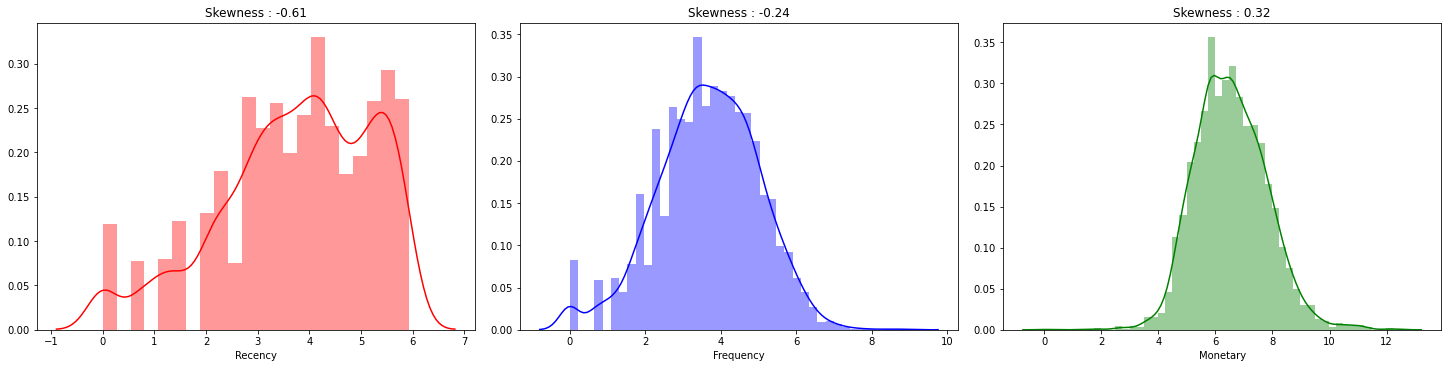

In [24]:
#Plot after transformation for the distributions :
i = 0
fig = plt.figure(constrained_layout = True,figsize = (20,5))
gs = GridSpec(1, 3, figure=fig)    

col = ['red','blue','green']
for var in list(log_RFM_data.columns[0:3]):
    plt.subplot(gs[0,i])
    sns.distplot(log_RFM_data[var],color= col[i])
    plt.title('Skewness ' + ': ' + round(log_RFM_data[var].skew(),2).astype(str))
    i= i+1
log_RFM_data.describe()

<i> Therefore all the variables are now approximately normally distributed. Will make all of them on the same scale as Monetary is little large in values.

In [25]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Scaled_RFM_data = ss.fit_transform(log_RFM_data)
Scaled_RFM_data = pd.DataFrame(Scaled_RFM_data,columns=log_RFM_data.columns,index=log_RFM_data.index)

Text(0.5, 1.0, 'Elbow Techinque to find the optimal cluster size')

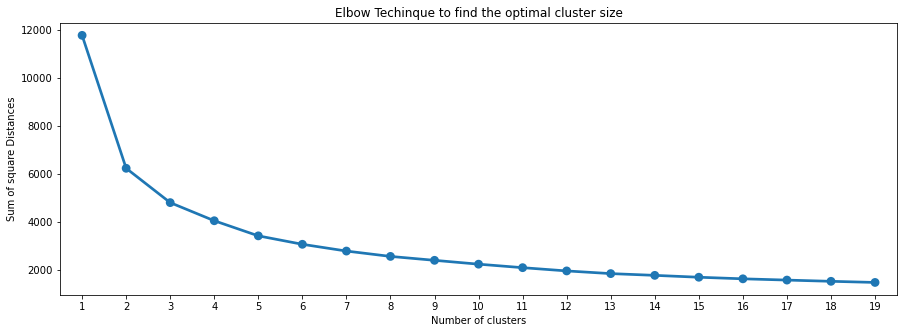

In [26]:
# Will search the optimal number of cluster based on the Elbow Method as below:
SS_distance = {}
for k in range(1,20):
    mod = KMeans(n_clusters= k, max_iter=1000,init = 'k-means++')
    mod = mod.fit(Scaled_RFM_data)
    SS_distance[k] = mod.inertia_

#Plotting the sum of square distance values and numbers of clusters
plt.figure(figsize = (15,5))
sns.pointplot(x = list(SS_distance.keys()), y = list(SS_distance.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Sum of square Distances")
plt.title("Elbow Techinque to find the optimal cluster size")

<i> We can observe that as the number of cluster increases the sum of square distance are becoming lesser. And will take the count of cluster where this elbow is bending. In our cases, sum of square distance is dramatically decreasing at K = 3, so this is optimal value to choose for no of clusters.

In [27]:
# Now we will perform K- means clustering on the data set.
KM_clust = KMeans(n_clusters= 3, init = 'k-means++',max_iter = 1000)
KM_clust.fit(Scaled_RFM_data)

# Mapping on the data
RFM_data['Cluster'] = KM_clust.labels_
RFM_data['Cluster'] = 'Cluster' + RFM_data['Cluster'].astype(str)
RFM_data.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Score,RFM_Loyality_level,Cluster
0,12346.0,325,1,77183.60,4,4,1,441,9,Potential lover,Cluster1
1,12747.0,2,103,4196.01,1,1,1,111,3,True Lover,Cluster2
2,12748.0,1,4596,33719.73,1,1,1,111,3,True Lover,Cluster2
3,12749.0,3,199,4090.88,1,1,1,111,3,True Lover,Cluster2
4,12820.0,3,59,942.34,1,2,2,122,5,True Lover,Cluster2


> <i> Clusters have been created based on the values of recency, frequency and monetary with the help of K-Means Clustering.

### Visualization for Recency, Frequency and Monetory : Cluster Groups

In [28]:
# Recency V/s Frequency
fig = px.scatter(RFM_data,x = 'Recency',y = 'Frequency', color = 'Cluster')
fig.show()

# Frequency V/s Monetary
fig = px.scatter(RFM_data,x = 'Monetary',y = 'Frequency', color = 'Cluster')
fig.show()

# Recency V/s Monetary
fig = px.scatter(RFM_data,x = 'Monetary',y = 'Recency', color = 'Cluster')
fig.show()


# Thank You, Readers!

Its great for me that you have read this notebook and would like to know about yours feedback for improvements as i believe sharing of knowledge will make us more powerful. Also it will be a kind help to know yours comment on this and please do upvote if yoy like it, once again thank you so much.

<img alt="Emoticon Thank You Stock Illustrations – 132 Emoticon Thank You ..." class="n3VNCb" src="https://thumbs.dreamstime.com/b/cute-blushing-yellow-emoticon-banner-illustration-thanks-quote-thank-you-greeting-card-concept-cute-yellow-d-smiley-face-159876347.jpg" data-noaft="1" jsname="HiaYvf" jsaction="load:XAeZkd;" style="width: 381px; height: 162.877px; margin: 28.0613px 0px;">